# Local Measures of segregation

This is an example notebook of functionalities for local measures of the *segregation* module. Firstly, we need to import the packages and functions we need:

In [1]:
import pysal.lib
from pysal.explore import segregation
import geopandas as gpd
import matplotlib.pyplot as plt

from pysal.explore.segregation.local import MultiLocationQuotient, MultiLocalDiversity, MultiLocalEntropy, MultiLocalSimpsonInteraction, MultiLocalSimpsonConcentration, LocalRelativeCentralization

Then it's time to load some data to estimate segregation. We use the data of 2000 Census Tract Data for the metropolitan area of Sacramento, CA, USA. 

We use a geopandas dataframe available in PySAL examples repository.

For more information about the data: https://github.com/pysal/pysal.lib/tree/master/pysal.lib/examples/sacramento2

In [2]:
input_df = gpd.read_file(pysal.lib.examples.get_path("sacramentot2.shp"))
input_df.columns

Index(['FIPS', 'MSA', 'TOT_POP', 'POP_16', 'POP_65', 'WHITE_', 'BLACK_',
       'ASIAN_', 'HISP_', 'MULTI_RA', 'MALES', 'FEMALES', 'MALE1664',
       'FEM1664', 'EMPL16', 'EMP_AWAY', 'EMP_HOME', 'EMP_29', 'EMP_30',
       'EMP16_2', 'EMP_MALE', 'EMP_FEM', 'OCC_MAN', 'OCC_OFF1', 'OCC_INFO',
       'HH_INC', 'POV_POP', 'POV_TOT', 'HSG_VAL', 'FIPSNO', 'POLYID',
       'geometry'],
      dtype='object')

**Important: all classes that start with "Multi_" expects a specific type of input of multigroups since the index will be calculated using many groups.
On the other hand, other classes expects a single group for calculation of the metrics.**

The groups of interest are White, Black, Asian and Hispanic population. Therefore, we create an auxiliary list with only the necessary columns for fitting the index.

In [3]:
groups_list = ['WHITE_', 'BLACK_', 'ASIAN_','HISP_']

We also can plot the spatial distribution of the composition of each of these groups over the tracts of Sacramento:

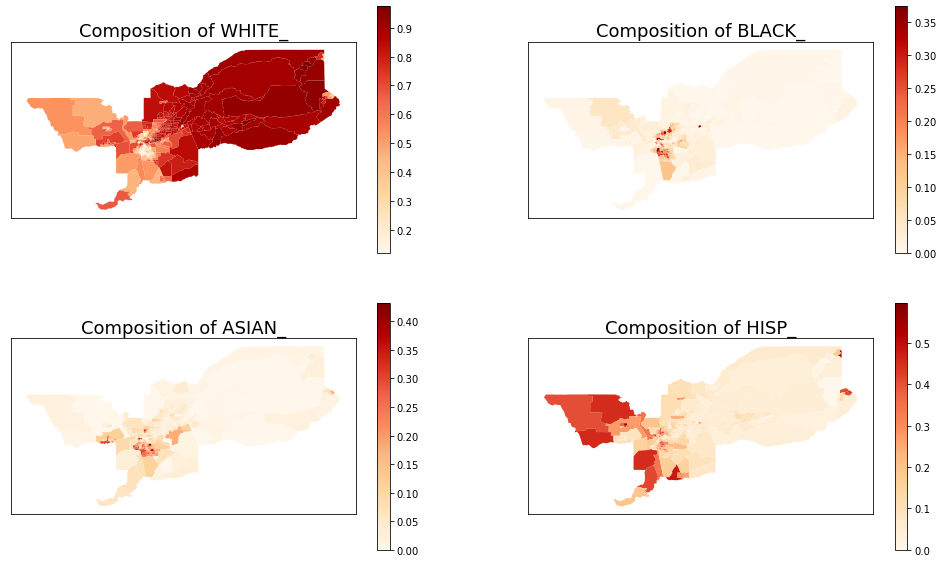

In [4]:
for i in range(len(groups_list)):
    input_df['comp_' + groups_list[i]] = input_df[groups_list[i]] / input_df['TOT_POP']

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (17, 10))


input_df.plot(column = 'comp_' + groups_list[0],
              cmap = 'OrRd',
              legend = True, ax = axes[0,0])
axes[0,0].set_title('Composition of ' + groups_list[0], fontsize = 18)
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])
axes[0,0].set_facecolor('white')


input_df.plot(column = 'comp_' + groups_list[1],
              cmap = 'OrRd',
              legend = True, ax = axes[0,1])
axes[0,1].set_title('Composition of ' + groups_list[1], fontsize = 18)
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_facecolor('white')


input_df.plot(column = 'comp_' + groups_list[2],
              cmap = 'OrRd',
              legend = True, ax = axes[1,0])
axes[1,0].set_title('Composition of ' + groups_list[2], fontsize = 18)
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
axes[1,0].set_facecolor('white')

input_df.plot(column = 'comp_' + groups_list[3],
              cmap = 'OrRd',
              legend = True, ax = axes[1,1])
axes[1,1].set_title('Composition of ' + groups_list[3], fontsize = 18)
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_facecolor('white')

# Location Quotient (LQ)

In [5]:
index = MultiLocationQuotient(input_df, groups_list)
index.statistics

array([[1.36543221, 0.07478049, 0.16245651, 0.38088068],
       [1.18002164, 0.        , 0.14836683, 1.18544649],
       [0.68072696, 0.03534425, 0.        , 3.31119136],
       ...,
       [0.99613635, 0.10550213, 0.20912883, 1.86164972],
       [0.92802194, 0.24709231, 0.47460486, 1.92804399],
       [1.06821891, 0.07674888, 0.70759745, 1.29220137]])

Important to note that column k has the Location Quotient (LQ) of position k in groups. Therefore, the LQ of the first unit of `'WHITE_'` is `1.36543221` and, for example the LQ of `'BLACK_'` of the last spatial unit is `0.07674888`. In addition, in this case we can plot the LQ of every group in the dataset similarly the way we did previously with the composition:

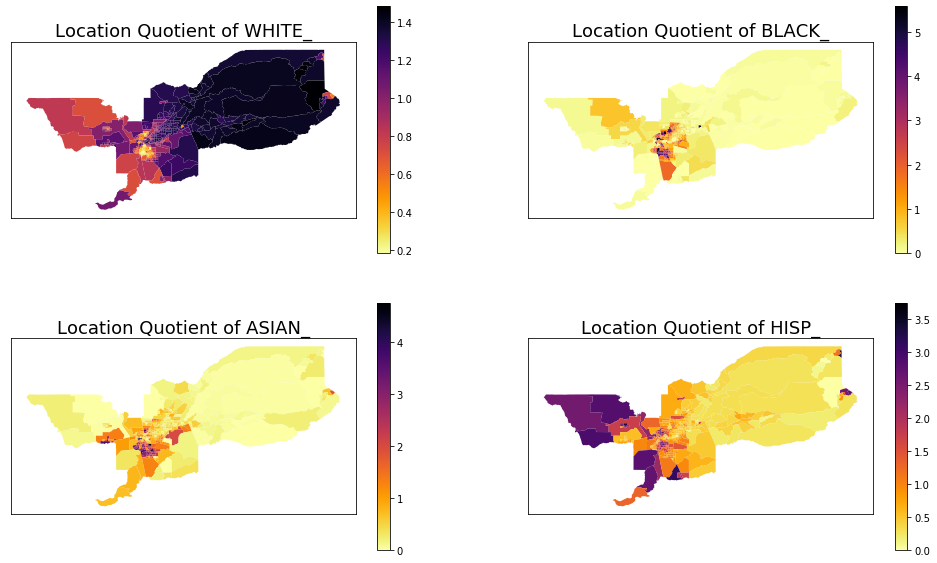

In [6]:
for i in range(len(groups_list)):
    input_df['LQ_' + groups_list[i]] = index.statistics[:,i]

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (17, 10))


input_df.plot(column = 'LQ_' + groups_list[0],
              cmap = 'inferno_r',
              legend = True, ax = axes[0,0])
axes[0,0].set_title('Location Quotient of ' + groups_list[0], fontsize = 18)
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])
axes[0,0].set_facecolor('white')


input_df.plot(column = 'LQ_' + groups_list[1],
              cmap = 'inferno_r',
              legend = True, ax = axes[0,1])
axes[0,1].set_title('Location Quotient of ' + groups_list[1], fontsize = 18)
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_facecolor('white')


input_df.plot(column = 'LQ_' + groups_list[2],
              cmap = 'inferno_r',
              legend = True, ax = axes[1,0])
axes[1,0].set_title('Location Quotient of ' + groups_list[2], fontsize = 18)
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
axes[1,0].set_facecolor('white')

input_df.plot(column = 'LQ_' + groups_list[3],
              cmap = 'inferno_r',
              legend = True, ax = axes[1,1])
axes[1,1].set_title('Location Quotient of ' + groups_list[3], fontsize = 18)
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_facecolor('white')

# Local Diversity

In [7]:
index = MultiLocalDiversity(input_df, groups_list)
index.statistics[0:10] # Values of first 10 units

array([0.34332326, 0.56109229, 0.70563225, 0.29713472, 0.22386084,
       0.29742517, 0.12322789, 0.11274579, 0.09402405, 0.25129616])

Text(0.5, 1, 'Local Diversity')

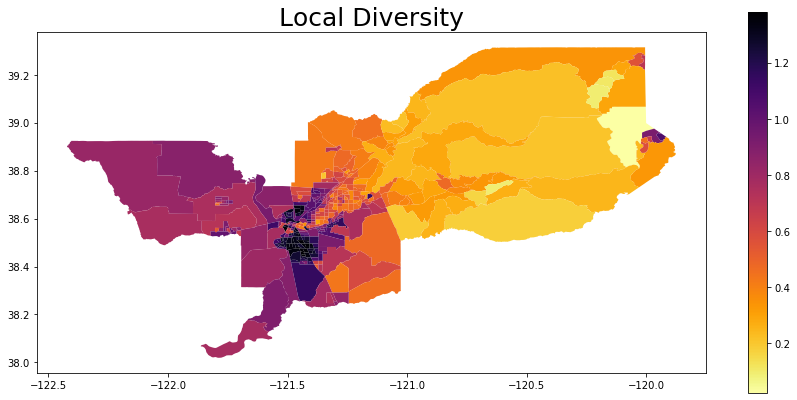

In [8]:
input_df['Local_Diversity'] = index.statistics
input_df.head()
ax = input_df.plot(column = 'Local_Diversity', cmap = 'inferno_r', legend = True, figsize = (15,7))
ax.set_title("Local Diversity", fontsize = 25)

# Local Entropy

In [9]:
index = MultiLocalEntropy(input_df, groups_list)
index.statistics[0:10] # Values of first 10 units

array([0.24765538, 0.40474253, 0.50900607, 0.21433739, 0.16148146,
       0.21454691, 0.08889013, 0.08132889, 0.06782401, 0.18127186])

Text(0.5, 1, 'Local Entropy')

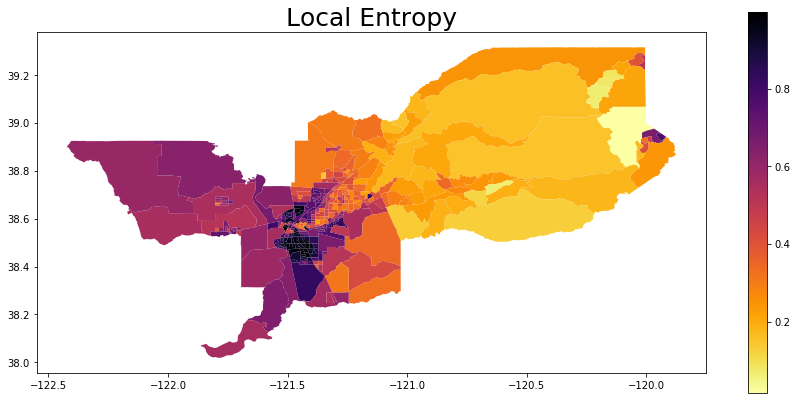

In [10]:
input_df['Local_Entropy'] = index.statistics
input_df.head()
ax = input_df.plot(column = 'Local_Entropy', cmap = 'inferno_r', legend = True, figsize = (15,7))
ax.set_title("Local Entropy", fontsize = 25)

# Local Simpson Interaction

In [11]:
index = MultiLocalSimpsonInteraction(input_df, groups_list)
index.statistics[0:10] # Values of first 10 units

array([0.15435993, 0.33391595, 0.49909747, 0.1299449 , 0.09805056,
       0.13128178, 0.04447356, 0.0398933 , 0.03723054, 0.11758548])

Text(0.5, 1, 'Local Simpson Interaction')

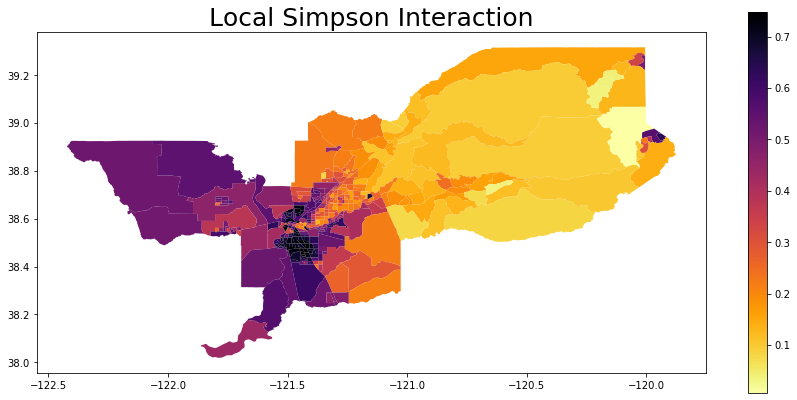

In [12]:
input_df['Local_Simpson_Interaction'] = index.statistics
input_df.head()
ax = input_df.plot(column = 'Local_Simpson_Interaction', cmap = 'inferno_r', legend = True, figsize = (15,7))
ax.set_title("Local Simpson Interaction", fontsize = 25)

# Local Simpson Concentration

In [13]:
index = MultiLocalSimpsonConcentration(input_df, groups_list)
index.statistics[0:10] # Values of first 10 units

array([0.84564007, 0.66608405, 0.50090253, 0.8700551 , 0.90194944,
       0.86871822, 0.95552644, 0.9601067 , 0.96276946, 0.88241452])

Text(0.5, 1, 'Local Simpson Concentration')

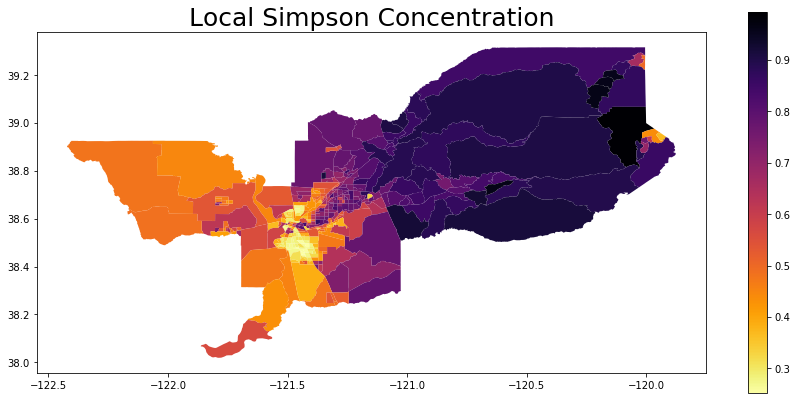

In [14]:
input_df['Local_Simpson_Concentration'] = index.statistics
input_df.head()
ax = input_df.plot(column = 'Local_Simpson_Concentration', cmap = 'inferno_r', legend = True, figsize = (15,7))
ax.set_title("Local Simpson Concentration", fontsize = 25)

# Local Centralization

Let's assume we want to calculate the Local Centralization to the group `'BLACK_'`:

In [15]:
index = LocalRelativeCentralization(input_df, 'BLACK_', 'TOT_POP')
index.statistics[0:10] # Values of first 10 units

array([ 0.03443055, -0.29063264, -0.19110976,  0.24978919,  0.01252249,
        0.61152941,  0.78917647,  0.53129412,  0.04436346, -0.20216325])

Text(0.5, 1, 'Local Centralization')

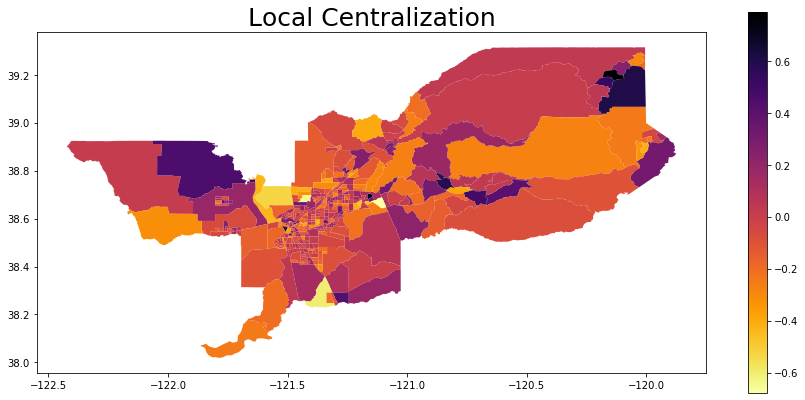

In [16]:
input_df['Local_Centralization'] = index.statistics
input_df.head()
ax = input_df.plot(column = 'Local_Centralization', cmap = 'inferno_r', legend = True, figsize = (15,7))
ax.set_title("Local Centralization", fontsize = 25)